In [1]:
# import functions
import numpy as np
import pandas as pd
import functions
import protein_contact_map
import matplotlib.pyplot as plt

In [28]:
def pdb_to_adjacency(pdb_file: str, cutoff=8.0) -> tuple:
    """
    Convert given PDB file to an adjacency matrix
    @param pdb_file: PDB file from RCSB or AlphaFold in each length range
    @return: tuple of the adjacency and distance matrices as numpy arrays
    """
    pcm = None
    if cutoff != 8.0:
        pcm = protein_contact_map.ProteinContactMap(pdb_file, cutoff)
    else:
        pcm = protein_contact_map.ProteinContactMap(pdb_file)
    alpha_carbons = pcm.get_alpha_carbons
    distance_array = protein_contact_map.get_distance_array(alpha_carbons)
    distance_matrix = protein_contact_map.get_distance_matrix(alpha_carbons, distance_array)
    adjacency_matrix = pcm.get_adjacency_matrix(alpha_carbons, distance_array)
    return distance_matrix, adjacency_matrix

def get_distances(adjacency_matrix: np.ndarray) -> np.ndarray:
    """
    Use adjacency array to get the amino acid distances
    @param adjacency_matrix: adjacency matrix from PDB file
    @return: array of distances in each range
    """
    distances_list = []
    for row_value in range(len(adjacency_matrix)):
        for col_value in range(len(adjacency_matrix)):
            if adjacency_matrix[row_value][col_value] == 1:
                distance = np.abs(col_value - row_value)
                distances_list.append(distance)
    return np.asarray(distances_list)


def return_distance_histogram1(given_algorithm: str, path_to_csvs: str) -> np.ndarray:
    """
    Compute the amino acid distance distribution for PDB files in given range from adjacency matrix
    and save in a numpy file.
    @param log_file: file to save exceptions in
    @param given_algorithm: alpha or rcsb
    @param length_range: 100, 200 or 300
    @param path_to_csvs: full path to csv files
    @return: None
    """
    dataframe = pd.read_csv(path_to_csvs)
    pdb_files = dataframe["filename"].to_numpy()
    histogram_list = []
    counter = 1
    pdb_files = pdb_files[:1]

    for pdb_file in pdb_files:
        print(f"Progress: {counter}/{len(pdb_files)}")
        if given_algorithm == "alpha":
            clean_pdb_filename = pdb_file.replace("/home/jguven/Projects/sequence_distance_distribution", "..")
        else:
            clean_pdb_filename = pdb_file
        try:
            adjacency_matrix = pdb_to_adjacency(clean_pdb_filename)[1]
            distances = get_distances(adjacency_matrix)
            print(distances)
            # bins = np.linspace(start=1, stop=200, num=100)
            bins = np.linspace(start=1, stop=350, num=350)
            histogram = np.histogram(distances, bins=bins, density=False)[0]
            histogram_list.append(histogram)
            counter += 1
        except FileNotFoundError as e:
            print(e)

    histogram_array = np.asarray(histogram_list)
    return histogram_array

def return_distance_histogram2(given_algorithm: str, path_to_csvs: str) -> np.ndarray:
    """
    Compute the amino acid distance distribution for PDB files in given range from adjacency matrix
    and save in a numpy file.
    @param log_file: file to save exceptions in
    @param given_algorithm: alpha or rcsb
    @param length_range: 100, 200 or 300
    @param path_to_csvs: full path to csv files
    @return: None
    """
    dataframe = pd.read_csv(path_to_csvs)
    pdb_files = dataframe["filename"].to_numpy()
    histogram_list = []
    counter = 1
    pdb_files = pdb_files[:1]

    for pdb_file in pdb_files:
        print(f"Progress: {counter}/{len(pdb_files)}")
        if given_algorithm == "alpha":
            clean_pdb_filename = pdb_file.replace("/home/jguven/Projects/sequence_distance_distribution", "..")
        else:
            clean_pdb_filename = pdb_file
        try:
            adjacency_matrix = pdb_to_adjacency(clean_pdb_filename)[1]
            distances = pdb_to_adjacency(clean_pdb_filename)[0]
            print(distances)
            # bins = np.linspace(start=1, stop=200, num=100)
            bins = np.linspace(start=1, stop=350, num=350)
            histogram = np.histogram(distances, bins=bins, density=False)[0]
            histogram_list.append(histogram)
            counter += 1
        except FileNotFoundError as e:
            print(e)

    histogram_array = np.asarray(histogram_list)
    return histogram_array

Progress: 1/1
[0 1 2 ... 2 1 0]
Progress: 1/1
[[ 0.          3.82943988  6.10649191 ... 29.69717406 33.11604047
  32.57743511]
 [ 3.82943988  0.          3.82725928 ... 28.91291021 32.1171995
  31.22749609]
 [ 6.10649191  3.82725928  0.         ... 28.59523488 31.6669573
  30.45074925]
 ...
 [29.69717406 28.91291021 28.59523488 ...  0.          3.78361832
   5.88087244]
 [33.11604047 32.1171995  31.6669573  ...  3.78361832  0.
   3.83055241]
 [32.57743511 31.22749609 30.45074925 ...  5.88087244  3.83055241
   0.        ]]


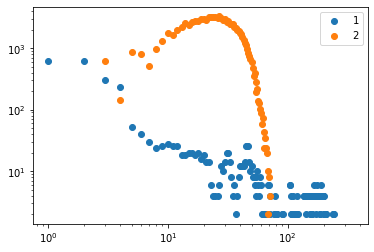

In [29]:
histogram_1 = return_distance_histogram1("alpha", "../data/alphafold/unique_secondary_structures_300.csv")
bins = np.linspace(1, 350, 350)[:-1]
histogram_2 = return_distance_histogram2("alpha", "../data/alphafold/unique_secondary_structures_300.csv")


plt.scatter(bins, histogram_1, label="1")
plt.scatter(bins, histogram_2, label="2")
plt.legend()
plt.xscale("log")
plt.yscale("log")

In [25]:
def pdb_to_adjacency(pdb_file: str, cutoff=8.0) -> tuple:
    """
    Convert given PDB file to an adjacency matrix
    @param pdb_file: PDB file from RCSB or AlphaFold in each length range
    @return: tuple of the adjacency and distance matrices as numpy arrays
    """
    pcm = None
    if cutoff != 8.0:
        pcm = protein_contact_map.ProteinContactMap(pdb_file, cutoff)
    else:
        pcm = protein_contact_map.ProteinContactMap(pdb_file)
    alpha_carbons = pcm.get_alpha_carbons
    distance_array = protein_contact_map.get_distance_array(alpha_carbons)
    distance_matrix = protein_contact_map.get_distance_matrix(alpha_carbons, distance_array)
    adjacency_matrix = pcm.get_adjacency_matrix(alpha_carbons, distance_array)
    return distance_matrix, adjacency_matrix



def return_distance_histogram2(given_algorithm: str, path_to_csvs: str) -> np.ndarray:
    """
    Compute the amino acid distance distribution for PDB files in given range from adjacency matrix
    and save in a numpy file.
    @param log_file: file to save exceptions in
    @param given_algorithm: alpha or rcsb
    @param length_range: 100, 200 or 300
    @param path_to_csvs: full path to csv files
    @return: None
    """
    dataframe = pd.read_csv(path_to_csvs)
    pdb_files = dataframe["filename"].to_numpy()
    histogram_list = []
    counter = 1
    pdb_files = pdb_files[:1]

    for pdb_file in pdb_files:
        print(f"Progress: {counter}/{len(pdb_files)}")
        if given_algorithm == "alpha":
            clean_pdb_filename = pdb_file.replace("/home/jguven/Projects/sequence_distance_distribution", "..")
        else:
            clean_pdb_filename = pdb_file
        try:
            adjacency_matrix = pdb_to_adjacency(clean_pdb_filename)[1]
            distances = pdb_to_adjacency(clean_pdb_filename)[0]
            print(distances)
            # bins = np.linspace(start=1, stop=200, num=100)
            bins = np.linspace(start=1, stop=350, num=350)
            histogram = np.histogram(distances, bins=bins, density=False)[0]
            histogram_list.append(histogram)
            counter += 1
        except FileNotFoundError as e:
            print(e)

    histogram_array = np.asarray(histogram_list)
    return histogram_array

In [26]:
histogram_1 = return_distance_histogram1("alpha", "../data/alphafold/unique_secondary_structures_300.csv")
histogram_2 = return_distance_histogram2("alpha", "../data/alphafold/unique_secondary_structures_300.csv")

Progress: 1/1
[0 1 2 ... 2 1 0]
Progress: 1/1
[[ 0.          3.82943988  6.10649191 ... 29.69717406 33.11604047
  32.57743511]
 [ 3.82943988  0.          3.82725928 ... 28.91291021 32.1171995
  31.22749609]
 [ 6.10649191  3.82725928  0.         ... 28.59523488 31.6669573
  30.45074925]
 ...
 [29.69717406 28.91291021 28.59523488 ...  0.          3.78361832
   5.88087244]
 [33.11604047 32.1171995  31.6669573  ...  3.78361832  0.
   3.83055241]
 [32.57743511 31.22749609 30.45074925 ...  5.88087244  3.83055241
   0.        ]]


In [27]:
histogram_2 = return_distance_histogram2("alpha", "../data/alphafold/unique_secondary_structures_300.csv")

Progress: 1/1
[[ 0.          3.82943988  6.10649191 ... 29.69717406 33.11604047
  32.57743511]
 [ 3.82943988  0.          3.82725928 ... 28.91291021 32.1171995
  31.22749609]
 [ 6.10649191  3.82725928  0.         ... 28.59523488 31.6669573
  30.45074925]
 ...
 [29.69717406 28.91291021 28.59523488 ...  0.          3.78361832
   5.88087244]
 [33.11604047 32.1171995  31.6669573  ...  3.78361832  0.
   3.83055241]
 [32.57743511 31.22749609 30.45074925 ...  5.88087244  3.83055241
   0.        ]]


In [21]:
histogram_2

array([[   0,    0,  628,  144,  864,  804,  504,  964, 1318, 1744, 1660,
        1980, 2226, 2570, 2412, 2666, 2714, 2804, 2926, 2992, 2842, 3214,
        3154, 3170, 3180, 3102, 3276, 3036, 2848, 2946, 2700, 2784, 2484,
        2456, 2428, 2186, 2144, 1986, 1874, 1746, 1708, 1502, 1366, 1226,
        1144,  978,  830,  758,  658,  590,  474,  354,  394,  280,  192,
         218,  140,  128,  104,   88,   58,   74,   44,   24,   34,   24,
          20,   10,    2,    8,    4,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [23]:
def pdb_to_adjacency(pdb_file: str) -> tuple:
    """
    Convert given PDB file to an adjacency matrix
    @param pdb_file: PDB file from RCSB or AlphaFold in each length range
    @return: tuple of the adjacency and distance matrices as numpy arrays
    """
    pcm = protein_contact_map.ProteinContactMap(pdb_file, default_threshold=21)
    alpha_carbons = pcm.get_alpha_carbons
    distance_array = protein_contact_map.get_distance_array(alpha_carbons)
    distance_matrix = protein_contact_map.get_distance_matrix(alpha_carbons, distance_array)
    adjacency_matrix = pcm.get_adjacency_matrix(alpha_carbons, distance_array)
    return distance_matrix, adjacency_matrix

In [4]:
def return_distance_histogram(log_file: str, given_algorithm: str, length_range: str, path_to_csvs: str) -> np.ndarray:
    """
    Compute the amino acid distance distribution for PDB files in given range from adjacency matrix
    and save in a numpy file.
    @param log_file: file to save exceptions in
    @param given_algorithm: alpha or rcsb
    @param length_range: 100, 200 or 300
    @param path_to_csvs: full path to csv files
    @return: None
    """
    dataframe = pd.read_csv(path_to_csvs)
    pdb_files = dataframe["filename"].to_numpy()
    histogram_list = []
    counter = 1
    with open(log_file, "w") as log_file:
        for pdb_file in pdb_files:
            # print(f"Progress: {counter}/{len(pdb_files)}")
            if given_algorithm == "alpha":
                clean_pdb_filename = pdb_file.replace("/home/jguven/Projects/sequence_distance_distribution", "..")
            else:
                clean_pdb_filename = pdb_file
            try:
                adjacency_matrix = pdb_to_adjacency(clean_pdb_filename)[1]
                distances = functions.get_distances(adjacency_matrix)
                # bins = np.linspace(start=1, stop=200, num=100)
                bins = np.linspace(start=1, stop=350, num=350)
                histogram = np.histogram(distances, bins=bins, density=False)[0]
                histogram_list.append(histogram)
                counter += 1
            except FileNotFoundError:
                traceback.print_exc(file=log_file)
    histogram_array = np.asarray(histogram_list)
    if not histogram_list:
        print("Warning: Histogram list is empty. Check log file.")
    if given_algorithm == "alpha":
        np.save(f"histogram_alpha_{length_range}_20.npy", histogram_array)
    elif given_algorithm == "rcsb":
        np.save(f"histogram_{length_range}_20.npy", histogram_array)



In [8]:
""" Functions for plotting an adjacency matrix from 3D simulations or PDBs"""
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import protein_contact_map
import functions
from colour_palette import _COLOUR_PALETTE


def get_pdb_matrix(pdb_file: str) -> np.ndarray:
    """
    Open a PDB file and return its adjacency matrix
    @param pdb_file: PDB file from either RCSB or AlphaFold (default)
    @return: adjacency matrix as a Numpy array
    """
    return pdb_to_adjacency(pdb_file)[1]


def set_adjacency_matrix_ticks(plot: matplotlib.axes.Axes) -> None:
    """
    Format tick labels for adjacency matrix plots
    @param plot: seaborn heatmap
    @return:
    """
    for index, label in enumerate(plot.get_xticklabels()):
        if index % 4 == 0:
            label.set_visible(True)
            label.set_rotation(360)
            label.set_font("Helvetica")
        else:
            label.set_visible(False)
    for index, label in enumerate(plot.get_yticklabels()):
        if index % 4 == 0:
            label.set_visible(True)
            label.set_font("Helvetica")
        else:
            label.set_visible(False)


def plot_adjacency_matrix(file: str, data_type: str) -> None:
    """
    Plot adjacency matrix for given protein file (or simulation matrix)
    @param file: PDB or matrix file
    @param data_type: PDB or SIM
    @return: None
    """
    adjacency_matrix = []
    if data_type == "sim":
        adjacency_matrix = functions.get_3d_simulation_adjacency_matrix(file)
    elif data_type == "pdb":
        adjacency_matrix = get_pdb_matrix(file)
    plt.figure(figsize=(6, 6))
    sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=1.8, font="Helvetica")
    colormap = [_COLOUR_PALETTE["NO_CONTACT"], _COLOUR_PALETTE["CONTACT"]]
    heatmap = sns.heatmap(adjacency_matrix, cmap=colormap, cbar=False)
    set_adjacency_matrix_ticks(heatmap)
    heatmap.set_xlabel("Amino acid")
    heatmap.set_ylabel("Amino acid")
    sns.despine()
    plt.tight_layout()
    plt.savefig(f"../plots/adjacency_matrices/{data_type}_matrix.jpeg", dpi=900)
    plt.show()


In [9]:
python plot.py adj --type=pdb --file=../plots/adjacency_matrices/3ufg.pdb

SyntaxError: invalid syntax (292530448.py, line 1)

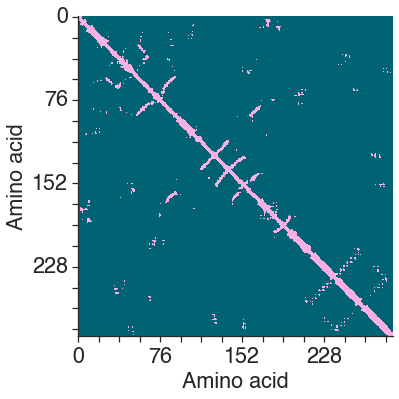

In [13]:
# 8 Å
plot_adjacency_matrix("../plots/adjacency_matrices/3ufg.pdb", "pdb")

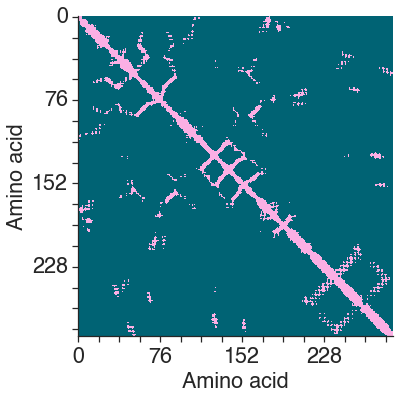

In [20]:
#10 Å
plot_adjacency_matrix("../plots/adjacency_matrices/3ufg.pdb", "pdb")

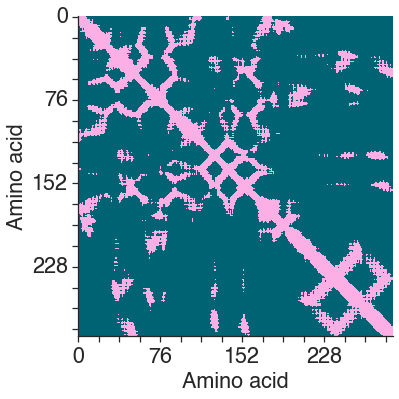

In [22]:
#15 Å
plot_adjacency_matrix("../plots/adjacency_matrices/3ufg.pdb", "pdb")

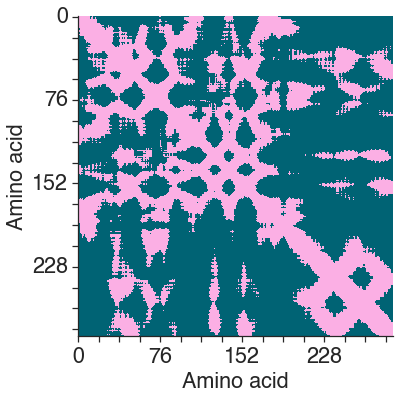

In [24]:
#21 Å
plot_adjacency_matrix("../plots/adjacency_matrices/3ufg.pdb", "pdb")

In [33]:
def add_diagonal_elements(simulation_matrix: np.ndarray):
    """
    Add diagonal elements to simulation matrices
    @param simulation_matrix: adjacency matrix from simulations
    @return: simulation matrix with diagonals set to 1
    """
    np.fill_diagonal(simulation_matrix, 1)
    off_diagonal = np.ones(len(np.diag(simulation_matrix, 1)))
    np.fill_diagonal(simulation_matrix[1:], off_diagonal)
    np.fill_diagonal(simulation_matrix[:, 1:], off_diagonal)
    return simulation_matrix

In [34]:
sim_matrix = np.loadtxt("../data/simulations/3d/matrices/matrix_300_14.txt")
print(add_diagonal_elements(sim_matrix))


[[1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 1. 1. 2.]
 [2. 2. 2. ... 1. 1. 1.]
 [2. 2. 2. ... 2. 1. 1.]]


In [23]:
matrix = np.loadtxt("../data/simulations/3d/matrices/matrix_300_14.txt")
matrix[matrix > 1] = 0
np.fill_diagonal(matrix, 1)



In [29]:
off_diagonal = np.ones(len(np.diag(matrix,1)))

In [32]:

np.fill_diagonal(matrix[1:], off_diagonal)
np.fill_diagonal(matrix[:,1:], off_diagonal)
matrix

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [40]:
def remove_diagonal_elements(pdb_matrix: np.ndarray):
    """
    Add diagonal elements to simulation matrices
    @param pdb_matrix: adjacency matrix from simulations
    @return: simulation matrix with diagonals set to 1
    """
    np.fill_diagonal(pdb_matrix, 0)
    off_diagonal = np.ones(len(np.diag(pdb_matrix, 1)))
    np.fill_diagonal(pdb_matrix[1:], off_diagonal)
    np.fill_diagonal(pdb_matrix[:, 1:], off_diagonal)
    return pdb_matrix


pdb_matrix = functions.pdb_to_adjacency("../plots/adjacency_matrices/3ufg.pdb")[1]
remove_diagonal_elements(pdb_matrix)

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

# 300

In [6]:
alpha_300 = pd.read_csv("../data/alphafold/unique_secondary_structures_300.csv")
len(alpha_300)

6231

In [91]:
return_distance_histogram(log_file="log.txt", given_algorithm="rcsb", length_range="300", path_to_csvs="../data/rcsb/secondary_structures_300.csv")

In [92]:
return_distance_histogram(log_file="log.txt", given_algorithm="alpha", length_range="300", path_to_csvs="../data/alphafold/unique_secondary_structures_300.csv")

In [130]:
# threshold 21 Å
hist = np.load("histogram_300_20.npy", allow_pickle=True)
# Threshold 15 Å
hist_15 = np.load("histogram_300_15.npy", allow_pickle=True)
alpha_15 = np.load("histogram_alpha_300_15.npy", allow_pickle=True)
# Threshold 10 Å
hist_10 = np.load("histogram_300_10.npy", allow_pickle=True)
# Threshold 8 Å
histogram_300 = np.load("../data/rcsb/histogram_300_not_normed.npy", allow_pickle=True)
# 300 3D simulation
simulation_300 = np.load("../data/simulations/3d/histogram_300_not_normed.npy", allow_pickle=True)

In [131]:
mean = np.mean(hist, axis=0)
normed_mean_new_300 = mean / np.sum(mean)

mean_10 = np.mean(hist_10, axis=0)
normed_mean_10 = mean_10 / np.sum(mean_10)

mean_15 = np.mean(hist_15, axis=0)
normed_mean_15 = mean_15 / np.sum(mean_15)

alpha_mean_15 = np.mean(alpha_15, axis=0)
normed_alpha_mean_15 = alpha_mean_15 / np.sum(alpha_mean_15)

sim_mean_300 = np.mean(simulation_300, axis=0)
normed_sim_mean_300 = sim_mean_300 / np.sum(sim_mean_300)

mean_300 = np.mean(histogram_300, axis=0)
normed_mean_300 = mean_300 / np.sum(mean_300)


distances = np.linspace(1, 350, 350)[:-1]

(0.0001, 0.19)

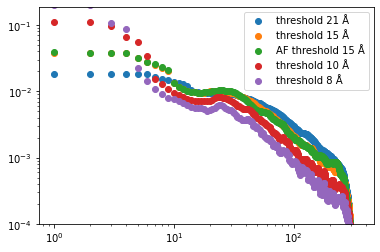

In [132]:
plt.scatter(distances, normed_mean_new_300, label="threshold 21 Å")
plt.scatter(distances, normed_mean_15, label="threshold 15 Å")
plt.scatter(distances, normed_alpha_mean_15, label="AF threshold 15 Å")
plt.scatter(distances, normed_mean_10, label="threshold 10 Å")
plt.scatter(distances, normed_mean_300, label="threshold 8 Å")
# plt.scatter(distances, normed_sim_mean_300, label="3D simulation")
plt.loglog()
plt.legend()
plt.ylim(0.0001,0.19)
# plt.xlim(3, 15)

# 200

In [99]:
return_distance_histogram(log_file="log.txt", given_algorithm="rcsb", length_range="200", path_to_csvs="../data/rcsb/secondary_structures_200.csv")

In [125]:
# threshold 21 Å
hist = np.load("histogram_200_20.npy", allow_pickle=True)
histogram_200 = np.load("../data/rcsb/histogram_200_not_normed.npy", allow_pickle=True)
simulation_200 = np.load("../data/simulations/3d/histogram_200_not_normed.npy", allow_pickle=True)
mean = np.mean(hist, axis=0)
normed_mean_new_200 = mean / np.sum(mean)
mean_200 = np.mean(histogram_200, axis=0)
normed_mean_200 = mean_200 / np.sum(mean_200)
sim_mean_200 = np.mean(simulation_200, axis=0)
normed_sim_mean_200 = sim_mean_200 / np.sum(sim_mean_200)
distances = np.linspace(1, 350, 350)[:-1]

(0.0001, 0.19)

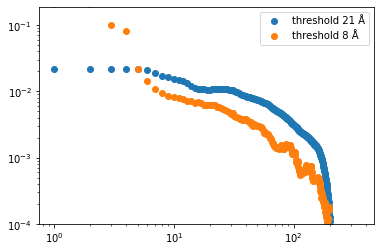

In [126]:
plt.scatter(distances, normed_mean_new_200, label="threshold 21 Å")
plt.scatter(distances, normed_mean_200, label="threshold 8 Å")
# plt.scatter(distances, normed_sim_mean_200, label="3D simulation")
plt.loglog()
plt.legend()
plt.ylim(0.0001,0.19)

# 100

In [109]:
return_distance_histogram(log_file="log.txt", given_algorithm="rcsb", length_range="100", path_to_csvs="../data/rcsb/secondary_structures_100.csv")

In [123]:
# threshold 21 Å
hist = np.load("histogram_100_20.npy", allow_pickle=True)
histogram_100 = np.load("../data/rcsb/histogram_100_not_normed.npy", allow_pickle=True)
simulation_100 = np.load("../data/simulations/3d/histogram_100_not_normed.npy", allow_pickle=True)
mean = np.mean(hist, axis=0)
normed_mean_new_100 = mean / np.sum(mean)
mean_100 = np.mean(histogram_100, axis=0)
normed_mean_100 = mean_100 / np.sum(mean_100)
sim_mean_100 = np.mean(simulation_100, axis=0)
normed_sim_mean_100 = sim_mean_100 / np.sum(sim_mean_100)
distances = np.linspace(1, 350, 350)[:-1]

(0.0001, 0.19)

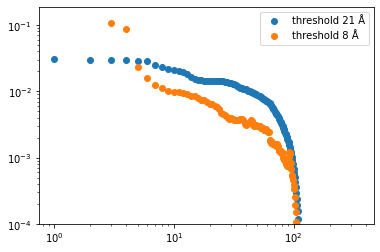

In [124]:
plt.scatter(distances, normed_mean_new_100, label="threshold 21 Å")
plt.scatter(distances, normed_mean_100, label="threshold 8 Å")
# plt.scatter(distances, normed_sim_mean_100, label="3D simulation")

plt.loglog()
plt.legend()
plt.ylim(0.0001,0.19)

# Compare

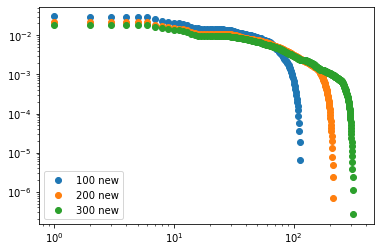

In [133]:
plt.scatter(distances, normed_mean_new_100, label="100 new")
plt.scatter(distances, normed_mean_new_200, label="200 new")
plt.scatter(distances, normed_mean_new_300, label="300 new")
plt.loglog()
plt.legend()

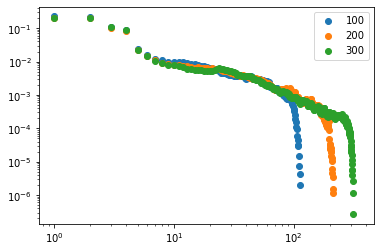

In [134]:
plt.scatter(distances, normed_mean_100, label="100")
plt.scatter(distances, normed_mean_200, label="200")
plt.scatter(distances, normed_mean_300, label="300")
plt.loglog()
plt.legend()